In [21]:
import random
import time
import math

import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline


In [22]:
def build_test_graph():
    G = nx.Graph()
    # Edges: (u, v, weight)
    edges = [
        (1, 2, 3),
        (1, 3, 1),
        (2, 3, 3),
        (2, 4, 1),
        (3, 4, 3),
        (3, 5, 2),
        (4, 5, 4),
    ]
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)
    return G

G = build_test_graph()
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges(data=True)))


Nodes: [1, 2, 3, 4, 5]
Edges: [(1, 2, {'weight': 3}), (1, 3, {'weight': 1}), (2, 3, {'weight': 3}), (2, 4, {'weight': 1}), (3, 4, {'weight': 3}), (3, 5, {'weight': 2}), (4, 5, {'weight': 4})]


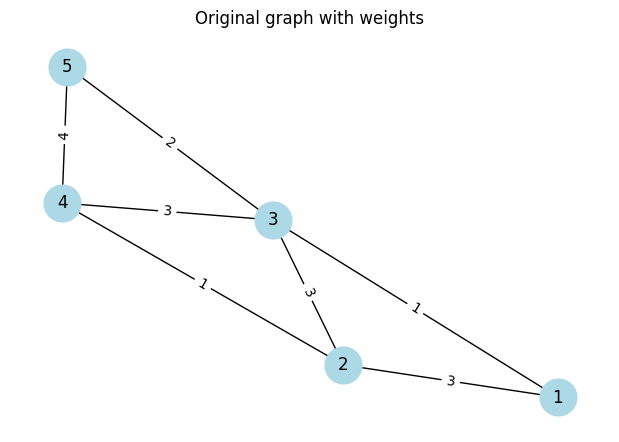

In [23]:
pos = nx.spring_layout(G, seed=0)  # fixed layout

plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Original graph with weights")
plt.axis("off")
plt.show()


In [24]:
def karger_min_cut_with_visualization(G, show_steps=True):
    H = G.copy()
    supernode_map = {node: {node} for node in H.nodes()}
    pos = nx.spring_layout(H, seed=0)
    
    step = 0
    while len(H.nodes()) > 2:
        if show_steps:
            plt.figure(figsize=(6, 4))
            
            # Prepare node colors: highlight u and v in red, others in light blue
            node_colors = ['lightblue'] * len(H.nodes())
            edges = []
            weights = []
            for u, v, data in H.edges(data=True):
                w = data.get("weight", 1.0)
                edges.append((u, v))
                weights.append(w)
            
            # Sample edge to contract
            (u, v) = random.choices(edges, weights=weights, k=1)[0]
            
            # Find indices for u and v
            nodes = list(H.nodes())
            u_idx = nodes.index(u)
            v_idx = nodes.index(v)
            node_colors[u_idx] = 'red'
            node_colors[v_idx] = 'red'
            
            nx.draw(H, pos, with_labels=True, node_color=node_colors, node_size=700)
            edge_labels = nx.get_edge_attributes(H, "weight")
            nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
            plt.title(f"Step {step}: Merging nodes {u} and {v}")
            plt.axis("off")
            plt.show()
        
        # Contract u and v
        supernode_map[u] |= supernode_map[v]
        del supernode_map[v]
        
        for nbr in list(H.neighbors(v)):
            if nbr == u:
                continue
            w = H[v][nbr].get("weight", 1.0)
            if H.has_edge(u, nbr):
                H[u][nbr]["weight"] += w
            else:
                H.add_edge(u, nbr, weight=w)
        
        H.remove_node(v)
        if H.has_edge(u, u):
            H.remove_edge(u, u)
        
        step += 1
    
    if show_steps:
        plt.figure(figsize=(6, 4))
        nx.draw(H, pos, with_labels=True, node_color="lightblue", node_size=700)
        edge_labels = nx.get_edge_attributes(H, "weight")
        nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
        plt.title(f"Final graph with {len(H.nodes())} supernodes")
        plt.axis("off")
        plt.show()
    
    nodes = list(H.nodes())
    a, b = nodes[0], nodes[1]
    cut_value = H[a][b].get("weight", 0.0)
    S = supernode_map[a]
    T = supernode_map[b]
    
    return cut_value, (S, T)


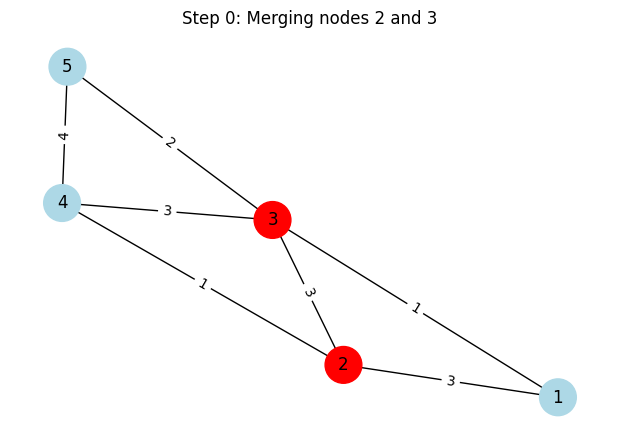

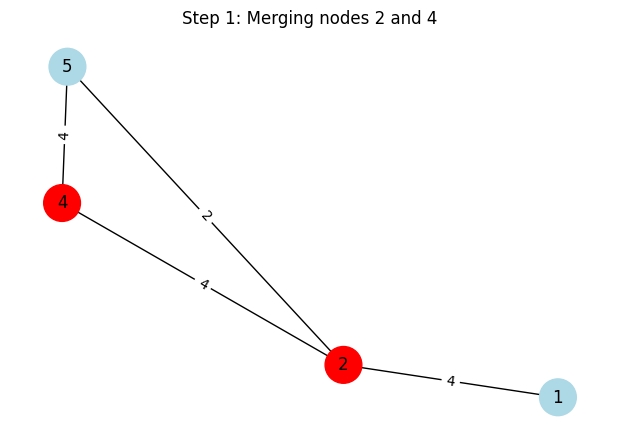

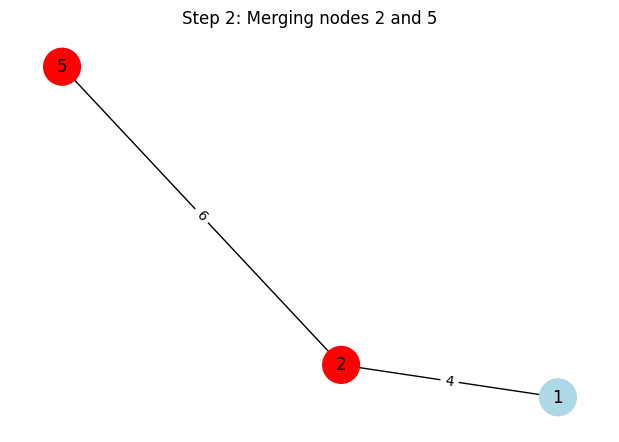

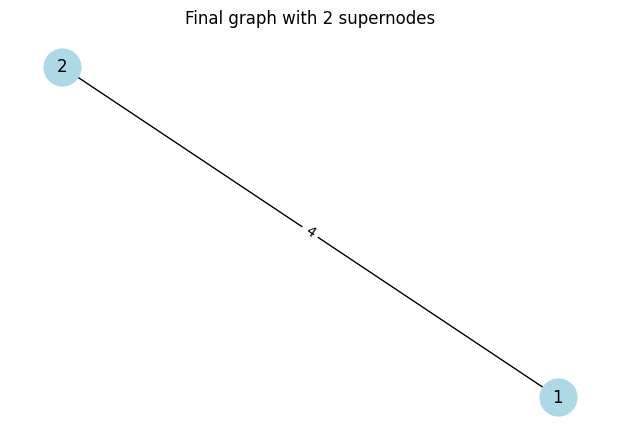

Cut value: 4
Partition S: {1}
Partition T: {2, 3, 4, 5}


In [19]:
best_val, (S, T) = karger_min_cut_with_visualization(G, show_steps=True)
print("Cut value:", best_val)
print("Partition S:", S)
print("Partition T:", T)


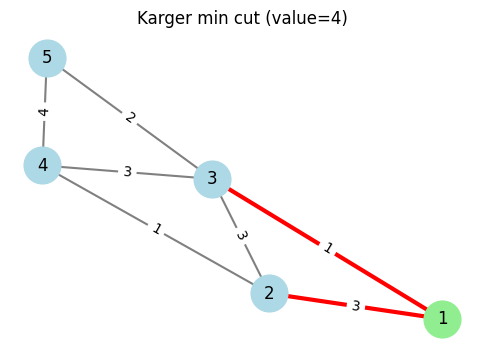

In [20]:
def draw_cut(G, partition, pos=None, title="Min cut"):
    if pos is None:
        pos = nx.spring_layout(G, seed=0)
    S, T = partition
    S = set(S)
    T = set(T)
    cut_edges = []
    other_edges = []
    for u, v in G.edges():
        if (u in S and v in T) or (u in T and v in S):
            cut_edges.append((u, v))
        else:
            other_edges.append((u, v))
    plt.figure(figsize=(6, 4))
    nx.draw_networkx_nodes(G, pos, nodelist=S, node_color="lightgreen", node_size=700)
    nx.draw_networkx_nodes(G, pos, nodelist=T, node_color="lightblue", node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=other_edges, edge_color="gray", width=1.5)
    nx.draw_networkx_edges(G, pos, edgelist=cut_edges, edge_color="red", width=3)
    nx.draw_networkx_labels(G, pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis("off")
    plt.show()

draw_cut(G, (S, T), pos=pos, title=f"Karger min cut (value={best_val})")
